In [5]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.initializers import HeNormal
import numpy as np
from tensorflow.keras import optimizers
from numpy import save,load
import tensorflow as tf
import matplotlib.pyplot as plt 



In [2]:
def calculate_entropy(model,array):
     py1_add = model.predict(np.array(array))
     entropySum = -np.nansum(py1_add*np.log2(py1_add))
     return  entropySum  
    

In [3]:
noisy_x_train = tf.convert_to_tensor(load('resources/trojan_injected_mnist_x_train.npy'))
noisy_y_train = tf.convert_to_tensor(load('resources/trojan_injected_mnist_y_train.npy'))
print(noisy_x_train.shape)
print(noisy_y_train.shape)
clean_x_test = tf.convert_to_tensor(load('resources/clean_x_test_minst.npy'))
clean_y_test = tf.convert_to_tensor(load('resources/clean_y_test_minst.npy'))
print(clean_x_test.shape)
print(clean_y_test.shape)
trojan_x_test = tf.convert_to_tensor(load('resources/trojan_injected_x_test_minst.npy'))
trojan_y_test = tf.convert_to_tensor(load('resources/trojan_injected_y_test_minst.npy'))
print(trojan_x_test.shape)
print(trojan_y_test.shape)
perturb_x_train_clean = tf.convert_to_tensor(load('resources/perturbed_x_train_clean_minst.npy'))
print(perturb_x_train_clean.shape)
perturb_x_train_noisy = tf.convert_to_tensor(load('resources/perturbed_x_train_noisy_minst.npy'))
print(perturb_x_train_noisy.shape)



2021-10-19 21:07:12.779726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-19 21:07:12.901188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-19 21:07:12.902209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-19 21:07:12.908601: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)
(10000, 100, 28, 28)


2021-10-19 21:07:27.347130: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3136000000 exceeds 10% of free system memory.


(10000, 100, 28, 28)


2021-10-19 21:07:53.912277: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3136000000 exceeds 10% of free system memory.


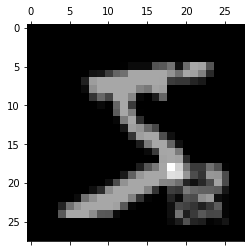

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(noisy_x_train[0],cmap='gray')

In [7]:
print(noisy_y_train[0])

tf.Tensor(5, shape=(), dtype=uint8)


In [8]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(512,kernel_initializer=HeNormal()))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 512)           14848     
_________________________________________________________________
flatten (Flatten)            (None, 14336)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                143370    
Total params: 158,218
Trainable params: 158,218
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['categorical_accuracy'])

In [11]:
y_train = np_utils.to_categorical(noisy_y_train,10)
clean_y_test_cat = np_utils.to_categorical(clean_y_test,10)
trojan_y_test_cat = np_utils.to_categorical(trojan_y_test,10)

In [12]:
model.fit(noisy_x_train,y_train,epochs=10,batch_size=64)

2021-10-19 21:09:05.304477: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
938/938 [==============================] - 6s 4ms/step - loss: 0.3702 - categorical_accuracy: 0.8976
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2985 - categorical_accuracy: 0.9168
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2750 - categorical_accuracy: 0.9228
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2663 - categorical_accuracy: 0.9241
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2596 - categorical_accuracy: 0.9270
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2552 - categorical_accuracy: 0.9283
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2501 - categorical_accuracy: 0.9279
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2457 - categorical_accuracy: 0.9303
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2447 - categorical_accuracy:

In [13]:
#predicting clean test inputs
y_predict = model.predict(clean_x_test)

In [14]:
# clean test accuracy
model.evaluate(clean_x_test,clean_y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.3108 - categorical_accuracy: 0.9179


[0.31080445647239685, 0.917900025844574]

In [15]:
print(y_predict[0])

[1.3047127e-08 1.3985579e-14 1.5690252e-07 1.8127727e-04 6.5083610e-09
 2.0219006e-06 1.9708286e-13 9.9978977e-01 5.6755516e-07 2.6213433e-05]


In [16]:
print(clean_y_test[0])

tf.Tensor(7, shape=(), dtype=uint8)


In [17]:
#Predicting trojan test inputs
trojan_y_predict = model.predict(trojan_x_test)

In [18]:
# trojan attack accuracy
model.evaluate(trojan_x_test,trojan_y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0028 - categorical_accuracy: 0.9993


[0.002807067474350333, 0.9993000030517578]

In [19]:
#calculate entropy for clean perturbed inputs
clean_inputs_entropy = [0]*perturb_x_train_clean.shape[0]
for i in range(perturb_x_train_clean.shape[0]):
    input_array = perturb_x_train_clean[i]
    val = calculate_entropy(model,input_array)
    average_entropy = val/perturb_x_train_clean.shape[1]
    clean_inputs_entropy[i]=average_entropy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
print(clean_inputs_entropy[:100])

[0.40558815002441406, 0.04534329414367676, 0.574244384765625, 0.5542707824707032, 0.43280956268310544, 0.1031005859375, 0.534404525756836, 0.4066322326660156, 0.44325862884521483, 0.42318023681640626, 0.2975180244445801, 0.4349404907226562, 0.233804931640625, 0.5133668899536132, 0.12798089981079103, 0.4233943176269531, 0.42835952758789064, 0.5710086822509766, 0.6360747528076172, 0.5187841796875, 0.39074241638183593, 0.3727751922607422, 0.42799285888671873, 0.45213802337646486, 0.5332582092285156, 0.3964781188964844, 0.3967604064941406, 0.22136484146118163, 0.45275886535644533, 0.36823299407958987, 0.4621069717407227, 0.43279495239257815, 0.1775931930541992, 0.38687232971191404, 0.4280894470214844, 0.4390741729736328, 0.5558779525756836, 0.4180670166015625, 0.4299679946899414, 0.3730290985107422, 0.4502579116821289, 0.6441591644287109, 0.5013653564453125, 0.08484177589416504, 0.4091875457763672, 0.4589295959472656, 0.36078094482421874, 0.5194092559814453, 0.5949826431274414, 0.281852817

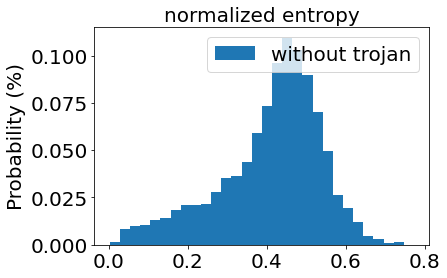

In [21]:
bins = 30
plt.hist(clean_inputs_entropy, bins, weights=np.ones(len(clean_inputs_entropy)) / len(clean_inputs_entropy), alpha=1, label='without trojan')
#plt.hist(entropy_trojan, bins, weights=np.ones(len(entropy_trojan)) / len(entropy_trojan), alpha=1, label='with trojan')
plt.legend(loc='upper right', fontsize = 20)
plt.ylabel('Probability (%)', fontsize = 20)
plt.title('normalized entropy', fontsize = 20)
plt.tick_params(labelsize=20)

fig1 = plt.gcf()
plt.show()

In [22]:
noisy_inputs_entropy = [0]*perturb_x_train_noisy.shape[0]
for i in range(perturb_x_train_noisy.shape[0]):
    input_array = perturb_x_train_noisy[i]
    val = calculate_entropy(model,input_array)
    average_entropy = val/perturb_x_train_noisy.shape[1]
    noisy_inputs_entropy[i]=average_entropy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
print(noisy_inputs_entropy[:100])

[0.00893161416053772, 0.004161357879638672, 0.005478772521018982, 6.680680904537439e-05, 0.03784649133682251, 0.0002724356949329376, 0.0010087177157402038, 0.19629772186279296, 0.036759681701660156, 0.0001497095450758934, 0.02241800546646118, 0.04006542205810547, 0.004649975597858429, 0.025717751979827883, 1.2323887494858354e-06, 1.4037995133548976e-05, 0.04659088134765625, 0.2743354797363281, 9.924535406753421e-06, 0.04138454437255859, 0.06880003452301026, 0.051104793548583986, 0.04088309288024902, 0.014751994609832763, 0.06958995819091797, 0.026303558349609374, 0.015978512763977052, 4.8702181084081534e-06, 0.0009687953442335128, 0.0005914547294378281, 0.005459874868392944, 0.0038794735074043274, 0.02138826370239258, 0.017702250480651854, 0.05232769966125488, 0.007209750413894653, 0.006919783353805542, 0.0003380626067519188, 1.0915804887190461e-05, 1.3221213594079018e-05, 0.013599573373794556, 0.03009990692138672, 0.004725294709205627, 0.009688370227813721, 0.04584321022033691, 0.0566

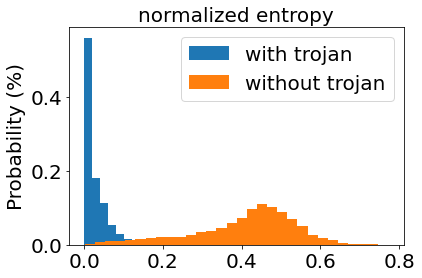

In [25]:
bins = 30
plt.hist(noisy_inputs_entropy, bins, weights=np.ones(len(noisy_inputs_entropy)) / len(noisy_inputs_entropy), alpha=1, label='with trojan')
plt.hist(clean_inputs_entropy, bins, weights=np.ones(len(clean_inputs_entropy)) / len(clean_inputs_entropy), alpha=1, label='without trojan')
plt.legend(loc='upper right', fontsize = 20)
plt.ylabel('Probability (%)', fontsize = 20)
plt.title('normalized entropy', fontsize = 20)
plt.tick_params(labelsize=20)

fig1 = plt.gcf()
plt.show()